# Daily Corn Price Forecasting using Linear Regression

In [1]:
# Project 3      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime 
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from sklearn.linear_model import LinearRegression

## 1. Data Import and Cleanup

In [2]:
# Read in corn actual price and sort by date
corn_act_prices = pd.read_csv(Path("../Resources/combined_portfolios_df.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
# Dropping Natural Gas and Corn Future
corn_act_prices = corn_act_prices.drop(columns=["Natural_Gas_future", "Corn_future", "avg_prcp"])
corn_act_prices.head(2), corn_act_prices.tail(2)

(            Corn_Price  USD_Index  Ethanol_future    avg_max   avg_min
 Date                                                                  
 2005-03-28      2.1275  84.620003           1.230  13.597000  0.724167
 2005-03-29      2.1300  84.320000           1.225  17.326667  2.610167,
             Corn_Price  USD_Index  Ethanol_future   avg_max   avg_min
 Date                                                                 
 2020-11-25      4.2300  91.989998            1.37  8.318667 -0.938833
 2020-11-30      4.2475  91.870003            1.40  8.385714 -4.750714)

In [3]:
# Drop nulls from Corn DataFrame
corn_act_prices.dropna(inplace=True)

## 2. Understanding the Dataset

In [4]:
corn_act_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3887 entries, 2005-03-28 to 2020-11-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Corn_Price      3887 non-null   float64
 1   USD_Index       3887 non-null   float64
 2   Ethanol_future  3887 non-null   float64
 3   avg_max         3887 non-null   float64
 4   avg_min         3887 non-null   float64
dtypes: float64(5)
memory usage: 182.2 KB


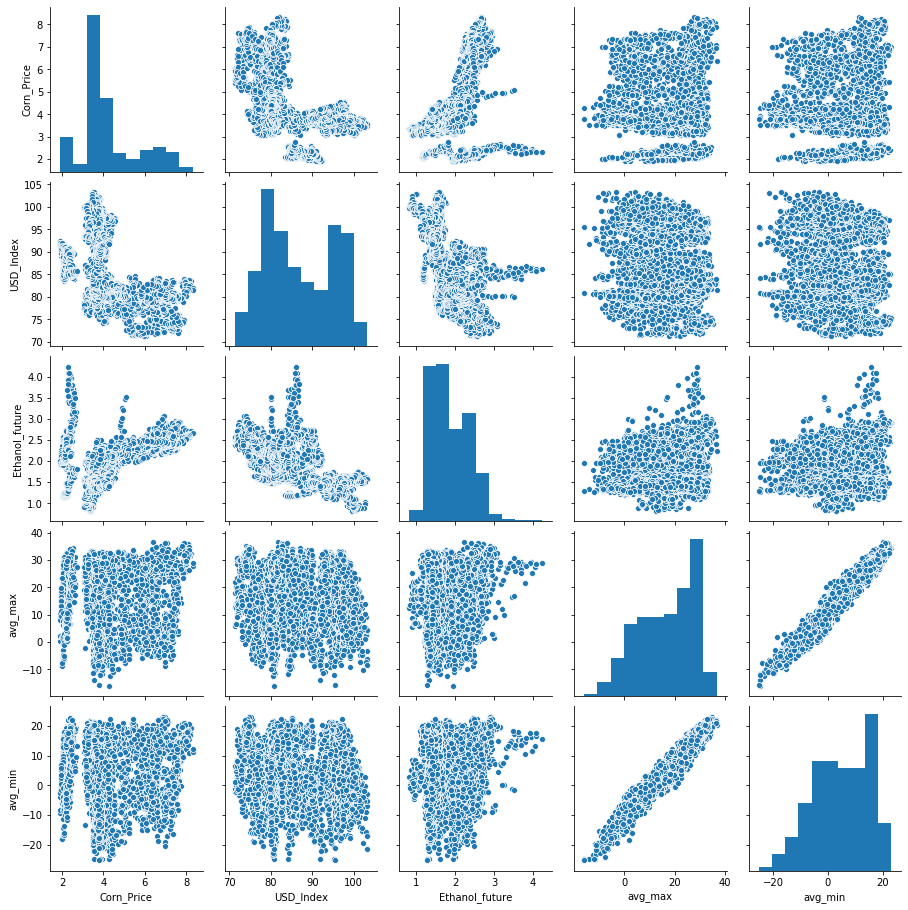

In [5]:
# Looking at the datasets with respect to each variable in pairs
sns.pairplot(corn_act_prices)

In [6]:
# Checking datasets size
corn_act_prices.shape

(3887, 5)

In [7]:
#Display Sample Data
corn_act_prices.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min
Date,,,,,
2020-11-20,4.2325,92.400002,1.39,18.355167,3.967333
2020-11-23,4.2650,92.510002,1.41,7.662000,-2.253167
2020-11-24,4.2710,92.230003,1.41,6.440000,-2.269556
2020-11-25,4.2300,91.989998,1.37,8.318667,-0.938833
2020-11-30,4.2475,91.870003,1.40,8.385714,-4.750714


## 3. Preparing Data for future forecasting

In [8]:
# Creating a lag of 90 days to predict for future three months
corn_act_prices['Corn_Price_3Mo_Forward']=corn_act_prices['Corn_Price'].shift(-90)
corn_act_prices.head(10)

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,
2005-03-28,2.1275,84.620003,1.230,13.597000,0.724167,2.2700
2005-03-29,2.1300,84.320000,1.225,17.326667,2.610167,2.2450
2005-03-30,2.1250,84.290001,1.215,19.458595,4.586810,2.2050
2005-03-31,2.1300,84.059998,1.230,19.090190,4.220071,2.2200
2005-04-01,2.1275,84.430000,1.215,15.113492,1.574048,2.1875
2005-04-04,2.0975,84.779999,1.200,20.211825,3.224167,2.2300
2005-04-05,2.0550,84.660004,1.205,22.704048,6.176746,2.2500
2005-04-06,2.0725,84.680000,1.200,22.383056,8.444444,2.1775
2005-04-07,2.0550,84.870003,1.160,21.270635,6.804881,2.1050


In [9]:
#Preparing the data for future forecast of 90 days
forecast_90 = corn_act_prices[-90:]
forecast_90.head(2)

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,
2020-07-23,3.2800,94.690002,1.17,28.747833,18.642000,NaN
2020-07-24,3.2625,94.440002,1.15,29.363556,18.636889,NaN


In [10]:
# Dropping NUll values
corn_act_prices=corn_act_prices.dropna()
corn_act_prices.head()

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,
2005-03-28,2.1275,84.620003,1.230,13.597000,0.724167,2.2700
2005-03-29,2.1300,84.320000,1.225,17.326667,2.610167,2.2450
2005-03-30,2.1250,84.290001,1.215,19.458595,4.586810,2.2050
2005-03-31,2.1300,84.059998,1.230,19.090190,4.220071,2.2200
2005-04-01,2.1275,84.430000,1.215,15.113492,1.574048,2.1875


In [11]:
#Display sample
corn_act_prices.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,
2020-07-16,3.3025,96.349998,1.205,28.212778,17.307556,4.2325
2020-07-17,3.3300,95.940002,1.170,29.672000,17.960556,4.2650
2020-07-20,3.2825,95.830002,1.107,29.965333,18.710000,4.2710
2020-07-21,3.2275,95.120003,1.107,28.184111,18.309000,4.2300
2020-07-22,3.2750,94.970001,1.190,28.836667,18.476000,4.2475


In [12]:
# Data checks
corn_act_prices.shape

(3797, 6)

## 4. Training and Validation Datasplit

In [13]:
# Train Test Split of 80% 20%
train = corn_act_prices.loc['2005-03-28':'2016-09-30']
test = corn_act_prices.loc['2016-10-1':]
train.shape, train.tail(2), test.shape, test.head(2)

((2852, 6),
             Corn_Price  USD_Index  Ethanol_future    avg_max    avg_min  \
 Date                                                                      
 2016-09-29      3.2925  95.540001           1.540  19.153111   8.763778   
 2016-09-30      3.3675  95.459999           1.547  20.405222  10.736444   
 
             Corn_Price_3Mo_Forward  
 Date                                
 2016-09-29                   3.745  
 2016-09-30                   3.755  ,
 (945, 6),
             Corn_Price  USD_Index  Ethanol_future    avg_max    avg_min  \
 Date                                                                      
 2016-10-03      3.4600  95.750000           1.570  21.360667  11.193222   
 2016-10-04      3.4825  96.120003           1.602  21.860667  10.962778   
 
             Corn_Price_3Mo_Forward  
 Date                                
 2016-10-03                  3.7425  
 2016-10-04                  3.7875  )

## 5. Prepare the Features (X) and the Target (y)

In [14]:
# Create dataframes for X_train and X_test, series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train.drop(columns=["Corn_Price_3Mo_Forward"])
X_test = test.drop(columns=["Corn_Price_3Mo_Forward"])

y_train = train["Corn_Price_3Mo_Forward"]
y_test = test["Corn_Price_3Mo_Forward"]

In [15]:
# Display Samples
X_train.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min
Date,,,,,
2005-03-28,2.1275,84.620003,1.230,13.597000,0.724167
2005-03-29,2.1300,84.320000,1.225,17.326667,2.610167
2005-03-30,2.1250,84.290001,1.215,19.458595,4.586810


In [16]:
# Display some samples
y_train[:3], y_test[:3]

(Date
 2005-03-28    2.270
 2005-03-29    2.245
 2005-03-30    2.205
 Name: Corn_Price_3Mo_Forward, dtype: float64,
 Date
 2016-10-03    3.7425
 2016-10-04    3.7875
 2016-10-05    3.7350
 Name: Corn_Price_3Mo_Forward, dtype: float64)

In [17]:
# Display Samples
X_test.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_max,avg_min
Date,,,,,
2016-10-03,3.4600,95.750000,1.570,21.360667,11.193222
2016-10-04,3.4825,96.120003,1.602,21.860667,10.962778
2016-10-05,3.4775,96.129997,1.602,23.704000,11.341778


In [18]:
# Data Checks
y_train.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

## 6. Linear Regression Model Development

In [19]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 0.73090268 -0.03548132 -0.31754055  0.01554788 -0.02281986]
4.708543139705636


## 7. Future Forecast

In [20]:
#Looking at the model parameters in dataframe
pd.DataFrame(model.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
Corn_Price,0.730903
USD_Index,-0.035481
Ethanol_future,-0.317541
avg_max,0.015548
avg_min,-0.022820


In [21]:
# Next 90 days prediction
forecast_90 = forecast_90.drop(columns=["Corn_Price_3Mo_Forward"])
predictions_90 = model.predict(forecast_90)
predictions_90

array([3.39621494, 3.40833509, 3.43119295, 3.39381979, 3.39576445,
       3.37504164, 3.37496964, 3.4080952 , 3.34107094, 3.42528914,
       3.42040777, 3.38211954, 3.34733148, 3.36544787, 3.3815622 ,
       3.46086258, 3.42996709, 3.53450493, 3.52606628, 3.49085722,
       3.50570083, 3.51363113, 3.50101876, 3.56784428, 3.57997854,
       3.6139358 , 3.64465302, 3.73455832, 3.70262642, 3.66042602,
       3.67089224, 3.80203396, 3.69731424, 3.67022908, 3.70002029,
       3.70724366, 3.83372952, 3.81516699, 3.86315643, 3.89539419,
       3.90305781, 3.858907  , 3.85193835, 3.81265036, 3.75969416,
       3.75389688, 3.73043418, 3.75548334, 3.83536371, 3.90316898,
       3.89993835, 3.92676259, 3.98202527, 4.00162586, 4.02244452,
       4.05823118, 3.96226685, 4.01879417, 4.02962937, 4.13573434,
       4.08806424, 4.00457744, 3.98438483, 4.07432283, 4.03562242,
       4.1672677 , 4.07215911, 4.05253375, 3.97618492, 3.96054364,
       3.9618362 , 4.0474732 , 4.12993857, 4.18901322, 4.20481

In [22]:
daily_forecast =  pd.DataFrame(predictions_90, columns = ['Corn Price Forecast'])
daily_forecast.to_csv("../Resources/daily_forecast_wo_prcp.csv")

## 8. Make predictions using the Testing Data
Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [23]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)
predictions

array([3.41827632, 3.42446481, 3.44046687, 3.40789903, 3.42364094,
       3.44685365, 3.34558035, 3.51271149, 3.51250419, 3.38941873,
       3.41429998, 3.48149132, 3.40783887, 3.4124293 , 3.47204525,
       3.43864156, 3.4216601 , 3.40196875, 3.41411864, 3.40901436,
       3.4422578 , 3.40655109, 3.42891106, 3.5232134 , 3.45327972,
       3.53062455, 3.41358721, 3.44683473, 3.39704346, 3.39328426,
       3.3719381 , 3.35358462, 3.32643414, 3.36150179, 3.38449829,
       3.27986221, 3.25822477, 3.30402649, 3.25098024, 3.25068147,
       3.20855865, 3.22818422, 3.35864175, 3.41045311, 3.41473683,
       3.37318964, 3.36961556, 3.44014679, 3.4880573 , 3.48185093,
       3.41877741, 3.40527342, 3.48589458, 3.44663091, 3.33938628,
       3.31583453, 3.26635312, 3.39033737, 3.27386132, 3.27732374,
       3.33741386, 3.28408597, 3.48737098, 3.47345796, 3.48755947,
       3.51383647, 3.46978154, 3.49831709, 3.51865992, 3.48573988,
       3.4969382 , 3.44863622, 3.4320587 , 3.45204164, 3.51186

In [24]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions
Results.head(3)

,Corn_Price_3Mo_Forward,Predicted Return
Date,,
2016-10-03,3.7425,3.418276
2016-10-04,3.7875,3.424465
2016-10-05,3.7350,3.440467


In [25]:
# Display top 3 rows
Results.head(3), Results.tail(3)

(            Corn_Price_3Mo_Forward  Predicted Return
 Date                                                
 2016-10-03                  3.7425          3.418276
 2016-10-04                  3.7875          3.424465
 2016-10-05                  3.7350          3.440467,
             Corn_Price_3Mo_Forward  Predicted Return
 Date                                                
 2020-07-20                  4.2710          3.394976
 2020-07-21                  4.2300          3.361425
 2020-07-22                  4.2475          3.381444)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F75FE2488>,
      dtype=object)

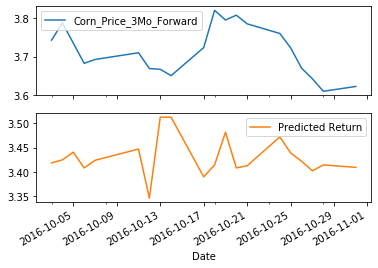

In [26]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

## 9. Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [27]:
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# A "good" MSE score will be close to zero while a "good".
mse = mean_squared_error(Results["Corn_Price_3Mo_Forward"],Results["Predicted Return"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(Results.Corn_Price_3Mo_Forward)}")

Mean Squared Error (MSE): 0.11189345443755606
Out-of-Sample Root Mean Squared Error (RMSE): 0.33450478985741905
Standard Deviation of Futures Return: 0.25782545992895256


## 10. In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [28]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Corn_Price_3Mo_Forward"],in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)

# Print the mser, rmse, and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(in_sample_results.Corn_Price_3Mo_Forward)}")

Mean Squared Error (MSE): 0.11189345443755606
In-sample Root Mean Squared Error (RMSE): 0.33450478985741905
Standard Deviation of Futures Return: 1.5223076039328485
